# Data Mining

## Tugas 4: k-Nearest Neighbours dan Clustering

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi **tugas4_NIM.ipynb**.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi *dilarang keras* menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

Terdapat enam *packages* yang Anda akan gunakan dalam mengerjakan tugas ini, yaitu:

- matplotlib
- numpy
- pandas
- scipy
- seaborn
- scikit-learn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini, kecuali dijelaskan sebaliknya. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda.

Pastikan jawaban Anda singkat, padat, dan jelas. Mayoritas pertanyaan yang diberikan dapat dijawab dalam 3-4 kalimat saja.

**NIM: 0102514015**

**Nilai akhir: XX/55**

### Import

In [1]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, adjusted_rand_score, confusion_matrix

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

RANDOM_STATE = 1945
plt.style.use('bmh')

In [2]:
df = pd.read_csv('../dataset/menu.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


### Deskripsi Dataset

Dataset ini berisi fakta nutrisi dari menu McDonald's di Amerika Serikat. Anda akan punya atribut berupa analisisi nutrisi yang dicantumkan pada situs McDonald's. Terdapat 9 kategori menu yang ada dalam dataset ini. Dengan dataset yang bersifat *imbalanced* ini, Anda akan mencoba memprediksi kategori tersebut dengan beberapa algoritma.

## 1. Preprocessing (20 poin)

Pada bagian ini, Anda diminta untuk mengekstraksi poin-poin penting dari dataset yang digunakan.

### Soal 1.1 (2 poin)

Tunjukkan distribusi kategori menu yang ada.

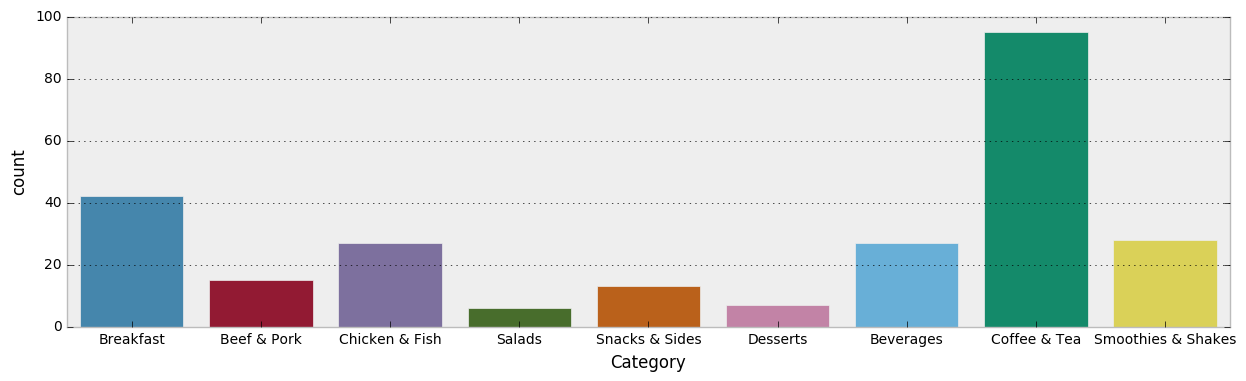

In [3]:
plt.figure(figsize=(15,4))
sns.countplot(df.Category)
plt.show()

### Soal 1.2.a (2 poin)

Gambarkan histogram untuk nilai `Calories` dari menu.

C:\Users\nurul\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


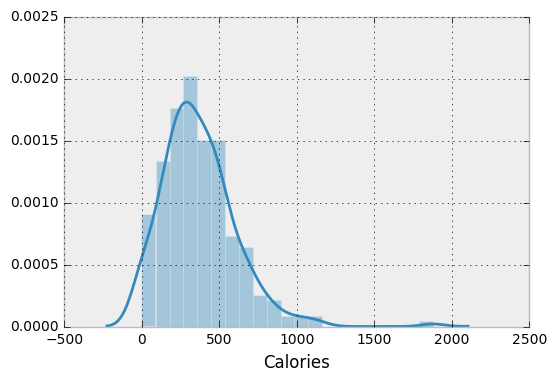

In [4]:
sns.distplot(df.Calories)
plt.show()

### Soal 1.2.b (1 poin)

Anda mungkin akan menemukan bahwa ada pencilan dari nilai `Calories`. Tunjukkan menu yang dimaksud.

In [5]:
df[df.Calories>1500]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,1060,118.0,182,20.0,101,1.0,...,118,39,6,24,1,87,0,15,8,25


### Soal 1.3.a (3 poin)

Kita ingin mencari tahu angka kebutuhan gizi dari menu yang ada. Untuk itu, gambarkanlah box plot dari:
- Total Fat (% Daily Value)
- Saturated Fat (% Daily Value)
- Cholesterol (% Daily Value)
- Sodium (% Daily Value)
- Carbohydrates (% Daily Value)
- Dietary Fiber (% Daily Value)
- Vitamin A (% Daily Value)
- Vitamin C (% Daily Value)
- Calcium (% Daily Value)
- Iron (% Daily Value)

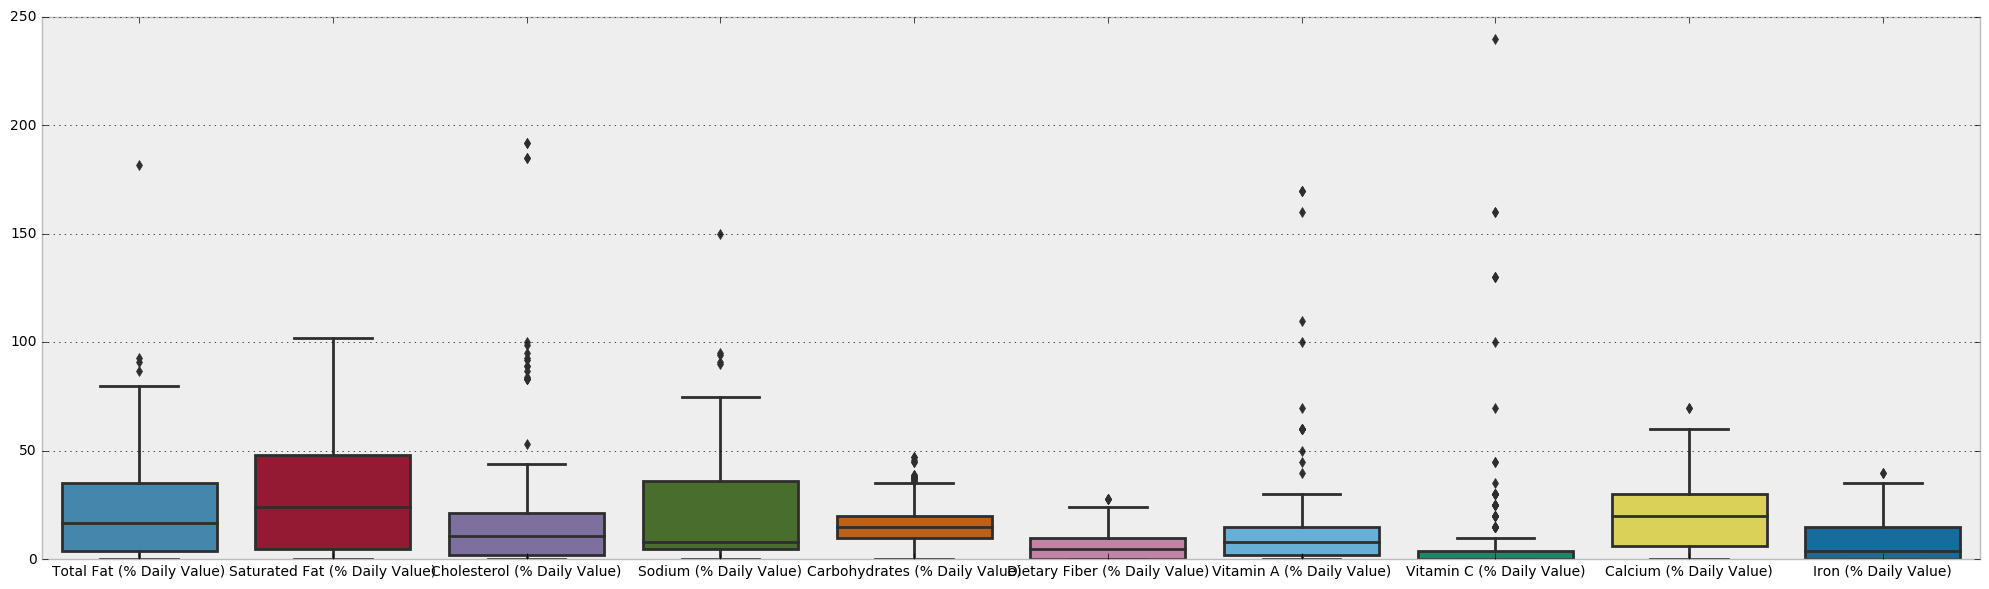

In [6]:
atribut = ['Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)', 'Cholesterol (% Daily Value)', 'Sodium (% Daily Value)', 'Carbohydrates (% Daily Value)', 'Dietary Fiber (% Daily Value)', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']
plt.figure(figsize=(25,7))
sns.boxplot(data=df[atribut])
plt.show()

### Soal 1.3.b (2 poin)

Dari box plot yang telah Anda hasilkan, Anda akan menemukan bahwa beberapa menu memiliki nilai > 100% angka kebutuhan gizi harian. Cari tahu menu-menu tersebut.

In [7]:
df[(df[atribut]>100).any(axis=1)]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
27,Breakfast,Big Breakfast (Regular Biscuit),9.5 oz (269 g),740,430,48.0,73,17.0,87,0.0,...,51,17,3,12,3,28,15,2,15,25
28,Breakfast,Big Breakfast (Large Biscuit),10 oz (283 g),800,470,52.0,80,18.0,90,0.0,...,56,19,4,17,3,28,15,2,15,30
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),14.8 oz (420 g),1090,510,56.0,87,19.0,96,0.0,...,111,37,6,23,17,36,15,2,25,40
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),15.3 oz (434 g),1150,540,60.0,93,20.0,100,0.0,...,116,39,7,28,17,36,15,2,30,40
40,Breakfast,Fruit & Maple Oatmeal,9.6 oz (251 g),290,35,4.0,6,1.5,8,0.0,...,58,19,5,19,32,5,2,130,10,10
41,Breakfast,Fruit & Maple Oatmeal without Brown Sugar,9.6 oz (251 g),260,40,4.0,6,1.5,8,0.0,...,49,16,5,22,18,5,2,130,6,10
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,1060,118.0,182,20.0,101,1.0,...,118,39,6,24,1,87,0,15,8,25
84,Salads,Premium Bacon Ranch Salad (without Chicken),7.9 oz (223 g),140,70,7.0,11,3.5,18,0.0,...,10,3,3,12,4,9,170,30,15,6
86,Salads,Premium Bacon Ranch Salad with Grilled Chicken,8.5 oz (241 g),220,80,8.0,13,4.0,20,0.0,...,8,3,2,10,4,29,110,30,15,8
87,Salads,Premium Southwest Salad (without Chicken),8.1 oz (230 g),140,40,4.5,7,2.0,9,0.0,...,20,7,6,23,6,6,160,25,15,10


### Soal 1.4.a (2 poin)

Apakah `Total Fat` berhubungan dengan `Cholesterol`? Kalau iya, seberapa berhubungan?

In [8]:
np.corrcoef(df['Total Fat'], df['Cholesterol'])

array([[ 1.        ,  0.68054737],
       [ 0.68054737,  1.        ]])

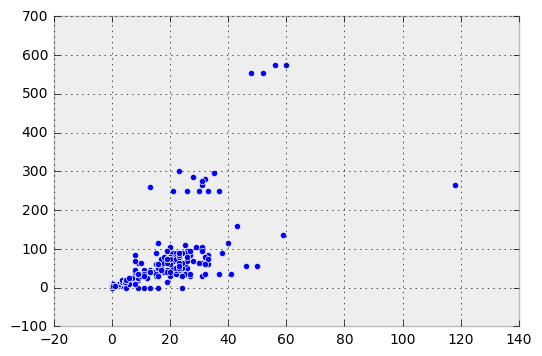

In [9]:
plt.scatter(df['Total Fat'], df['Cholesterol'])
plt.show()

Total Fat dan Cholesterol memiliki korelasi linear berbanding lurus dan cukup kuat (0.68). Sebuah menu yang memiliki kadar `Total Fat` yang tinggi, memiliki `Cholesterol` yang tinggi pula. Dan sebaliknya. 

### Soal 1.4.b (2 poin)

Gambarkan scatter plot-nya untuk melihat lebih jelas hubungan `Total Fat` dan `Cholesterol`.

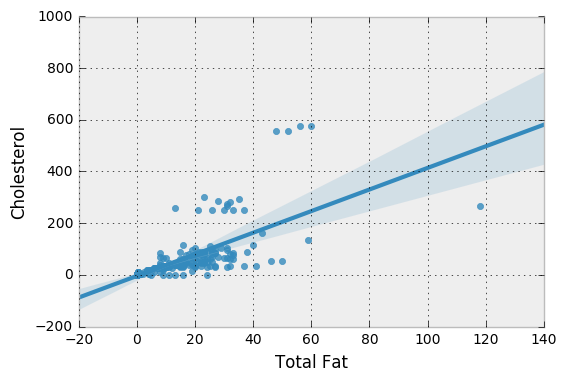

In [10]:
sns.regplot(df['Total Fat'], df['Cholesterol'])
plt.show()

### Soal 1.5 (6 poin)

Lakukan eksplorasi tambahan terhadap dataset yang telah diberikan. Apa lagi yang Anda ingin ketahui dari dataset ini?

C:\Users\nurul\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


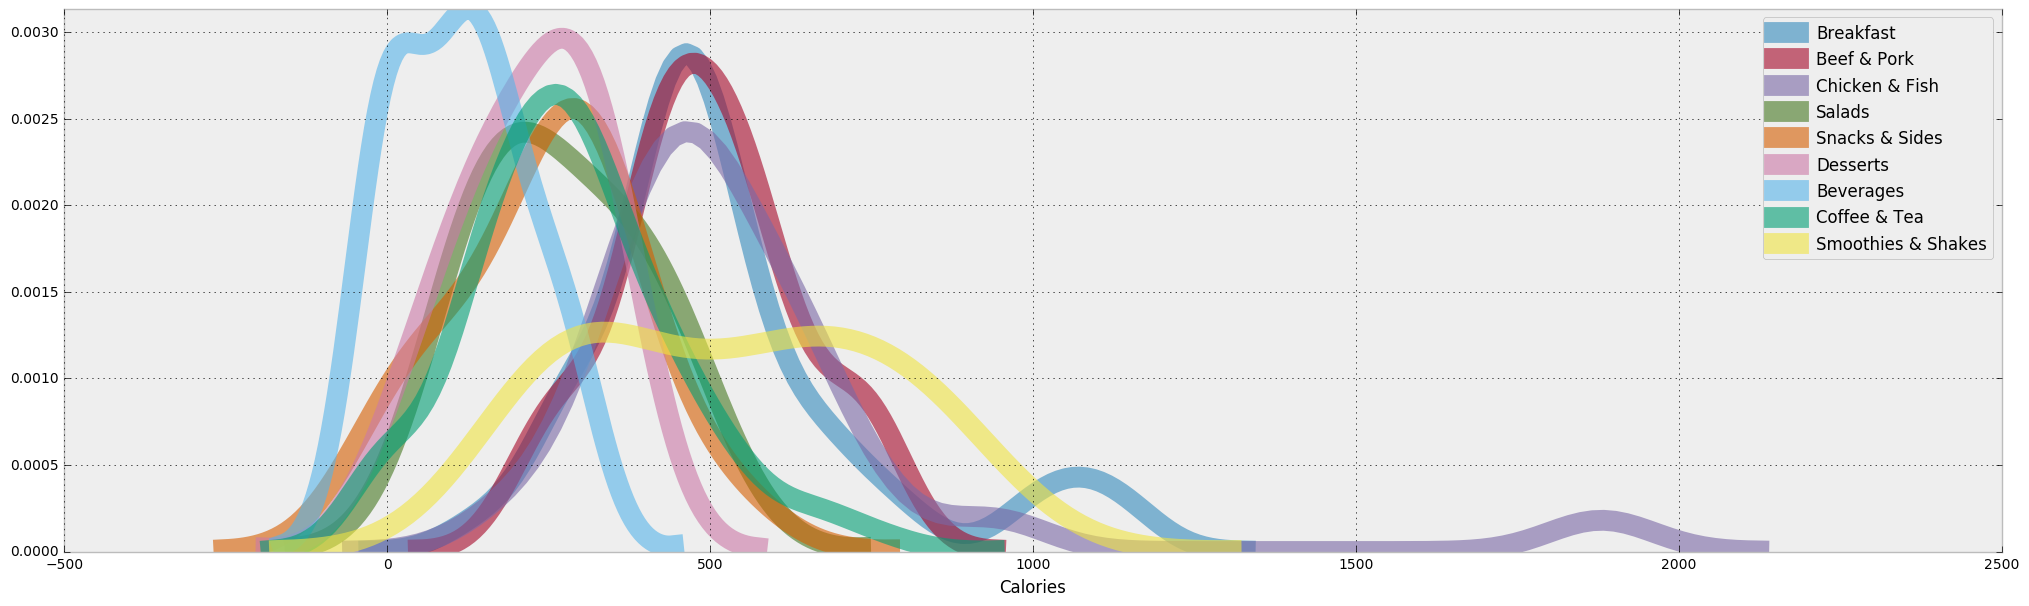

In [11]:
plt.figure(figsize=(25,7))
for item in df.Category.unique():
    sns.distplot(df['Calories'][df.Category==item], hist=False, label=item, kde_kws=dict(linewidth=15, alpha=0.6))
plt.legend()
plt.show()

## 2. k-Nearest Neighbours (20 poin)

Anda diminta untuk mengimplementasikan dan menjelaskan beberapa konsep yang digunakan dalam algoritma k-Nearest Neighbours.

### Soal 2.1 (3 poin)

Bagi dataset Anda dengan rasio train:test=70:30. Gunakan atribut angka kebutuhan gizi pada bagian 1 sebagai atribut dan `Category` sebagai kelas dan 42 sebagai parameter `random_state`.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (df[atribut],df['Category'], test_size = 0.3, random_state = 42)

### Soal 2.2.a (4 poin)

Klasifikasikan data uji dengan menggunakan algoritma k-NN dengan $k \in [1,7]$. Gambarkan perubahan akurasi yang dihasilkan dengan menggunakan line plot.

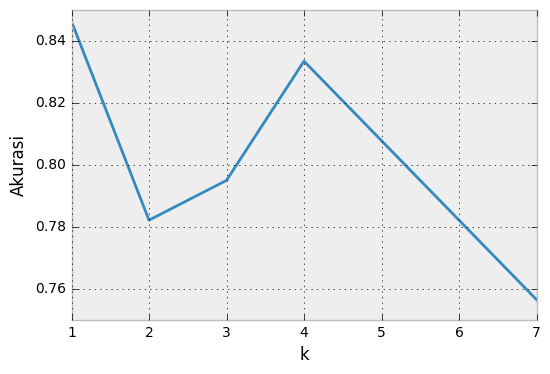

In [19]:
accuracy=[]
for k in range(1,8):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy.append(accuracy_score(y_test, knn.predict(X_test)))
    
fig, ax = plt.subplots()
ax.plot(range(1,8), accuracy)
plt.xlabel('k')
plt.ylabel('Akurasi')
plt.show()

### Soal 2.2.b (2 poin)

Dari plot tersebut, berapa nilai $k$ yang akan Anda pilih? Mengapa?

Saya memilih k yang memiliki akurasi paling besar, yaitu k = 1 yang menghasilkan akurasi sebesar 0.84615384615384615

### Soal 2.2.c (3 poin)

Dari nilai $k$ yang Anda pilih, buatlah *heatmap* dari *confusion matrix*-nya! Jangan lupa untuk memberikan label untuk masing-masing sumbunya dan menganotasi tiap kotak pada *heatmap*!

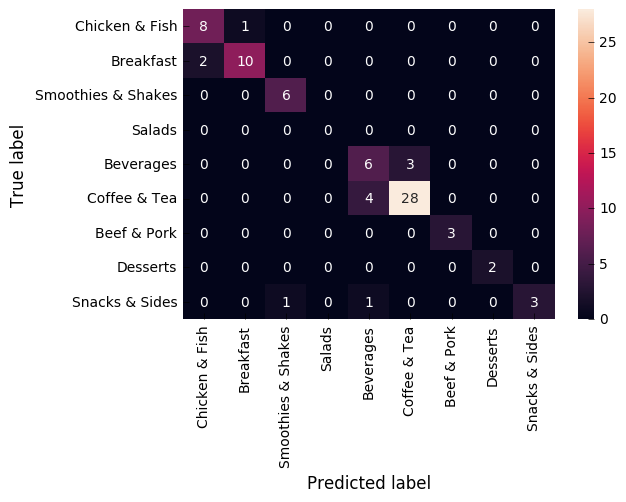

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred, y_train.unique())
ax = sns.heatmap(cm, annot=True)
ax.set_xticklabels(y_train.unique(), rotation=90)
ax.set_yticklabels(y_train.unique(), rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Soal 2.3 (2 poin)

Mengapa k-Nearest Neighbours disebut sebagai model *non-parametrik*?

k-Nearest Neighbours disebut model non-parametrik karena tidak memberikan asumsi apa-apa ketika membangun model tersebut. Dan knn tidak membuat model nya, hanya melihat pada jarak terdekat antar-data. Jika regresi memiliki model (y = ax+b), maka knn tidak. 

### Soal 2.4 (4 poin)

Coba perbaiki model Anda. Tambahkan atribut baru atau ganti nilai *hyperparameter*-nya. Apakah Anda dapat menghasilkan model yang lebih baik?

### Soal 2.5 (3 poin)

Tuliskan kesimpulan Anda dari eksperimen ini!

Dari atribut yang dipilih, ternyata sudah dapat melakukan klasifikasi dengan baik. Hanya kandungan `Coffe & Tea` dan `Beverages` yang masih besar angka false positive nya, hal ini kemungkinan karena kedua item tersebut memang                              mirip.

## 3. Clustering (15 poin)

Pada bagian ini, Anda akan mencoba melakukan klasifikasi dengan memanfaatkan algoritma *clustering* seperti k-Means dan Gaussian Mixture Models.

### Soal 3.1 (3 poin)

Dengan menggunakan `X`, lakukan clustering dengan k-Means. Gunakan nilai $k \in [2,15]$, lalu hitung nilai *inertia*-nya. Gambarkan *scree plot* dari *inertia* tersebut. Apa yang dapat Anda lihat?

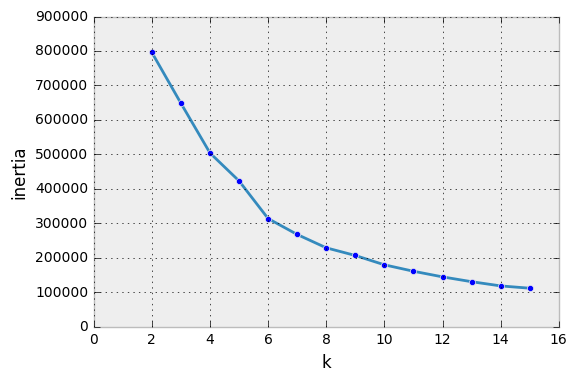

In [15]:
inertia = []
for k in range(2,16):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[atribut])
    inertia.append(kmeans.inertia_)
plt.plot(range(2,16), inertia, zorder=1)
plt.scatter(range(2,16), inertia, zorder=2)    
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

dengan nilai inertia yang ditujukkan dengan scree plot, terlihat bahwa jumlah k cluster paling baik adalah k = 6.

### Soal 3.2.a (3 poin)

Anda juga dapat mengevaluasi "akurasi" dari *clustering* yang Anda lakukan dengan menggunakan `adjusted_rand_score()`. Coba jalankan algoritma k-Means dengan $k=9$, lakukan sebanyak 100 kali. Lakukan *clustering* pada `X_train`, lalu prediksi *cluster* untuk data `X_test`. Kemudian, gambarkan histogram dari nilai evaluasi *adjusted Rand index* yang dihasilkan. Mengapa hasilnya bisa berbeda-beda?

In [16]:
ars=[]
for i in range(100):
    kmeans = KMeans(n_clusters=9)
    kmeans.fit(X_train)
    ars.append(adjusted_rand_score(y_test, kmeans.predict(X_test)))

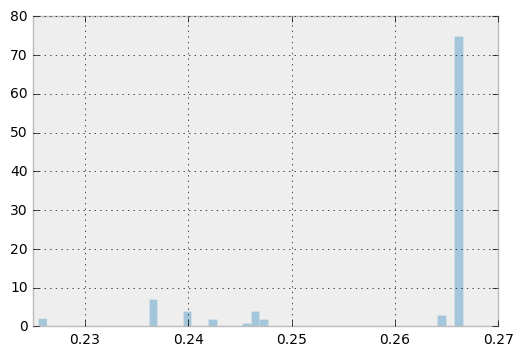

In [17]:
sns.distplot(ars, kde=False)

### Soal 3.2.b (2 poin)

Berapa nilai yang mungkin dari Adjusted Rand Index (ARI)? Apakah hasil yang Anda dapatkan di atas sudah cukup baik?

### Soal 3.2.c (3 poin)

Lakukan hal yang sama seperti yang Anda lakukan pada soal 3.2.a, tetapi kali ini gunakan algoritma Gaussian Mixture Models dengan 9 klaster. Gambarkan kembali histogram dari ARI-nya.

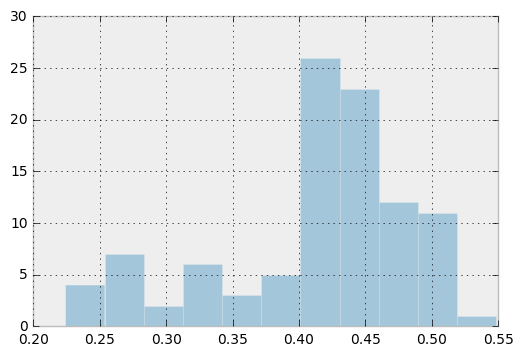

In [18]:
from sklearn.mixture import GaussianMixture
ars=[]
for i in range(100):
    gmm = GaussianMixture(n_components=9).fit(X_train)
    ars.append(adjusted_rand_score(y_test, gmm.predict(X_test)))
sns.distplot(ars, kde=False)

### Soal 3.3 (4 poin)

Tuliskan kesimpulan Anda dari eksperimen ini! Anda diperkenankan melakukan eksperimen tambahan untuk memperkuat kesimpulan Anda.

*Jawaban Anda di sini*